In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt


In [4]:
dataset1 = pd.read_csv('MyMLData.csv')
X = dataset1[['Input']].values
y = dataset1[['Output']].values


In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=33
)


In [6]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [7]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)

X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)


In [8]:
class NeuralNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(1, 10)
        self.fc2 = nn.Linear(10, 1)
        self.history = {'loss': []}

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x


In [9]:
ai_brain = NeuralNet()
criterion = nn.MSELoss()
optimizer = optim.Adam(ai_brain.parameters(), lr=0.01)


In [10]:
def train_model(ai_brain, X_train, y_train, criterion, optimizer, epochs=2000):
    for epoch in range(epochs):
        optimizer.zero_grad()
        output = ai_brain(X_train)
        loss = criterion(output, y_train)
        loss.backward()
        optimizer.step()

        ai_brain.history['loss'].append(loss.item())

        if epoch % 200 == 0:
            print(f"Epoch [{epoch}/{epochs}], Loss: {loss.item():.6f}")


In [11]:
train_model(ai_brain, X_train_tensor, y_train_tensor, criterion, optimizer)


Epoch [0/2000], Loss: 108.693748
Epoch [200/2000], Loss: 2.936442
Epoch [400/2000], Loss: 0.030102
Epoch [600/2000], Loss: 0.001286
Epoch [800/2000], Loss: 0.000291
Epoch [1000/2000], Loss: 0.000049
Epoch [1200/2000], Loss: 0.000014
Epoch [1400/2000], Loss: 0.000004
Epoch [1600/2000], Loss: 0.000001
Epoch [1800/2000], Loss: 0.000000


In [12]:
with torch.no_grad():
    test_loss = criterion(ai_brain(X_test_tensor), y_test_tensor)
    print(f"Test Loss: {test_loss.item():.6f}")


Test Loss: 0.000000


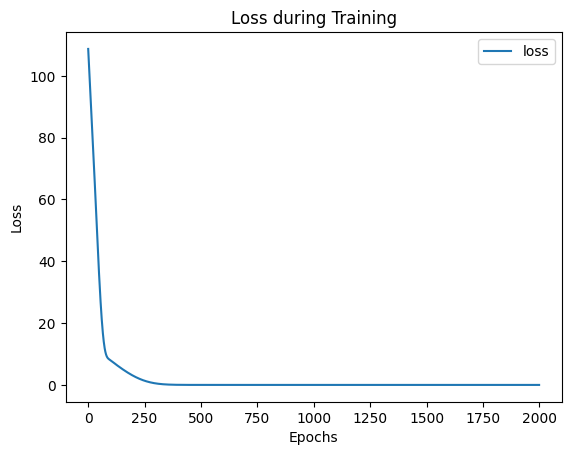

In [13]:
loss_df = pd.DataFrame(ai_brain.history)
loss_df.plot()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss during Training")
plt.show()


In [14]:
X_n1_1 = torch.tensor([[9]], dtype=torch.float32)
prediction = ai_brain(
    torch.tensor(scaler.transform(X_n1_1), dtype=torch.float32)
).item()

print(f"Prediction for input 9: {prediction}")


Prediction for input 9: 18.000125885009766
